In [8]:
#We are applying a deep learning model on mnist dataset

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
from keras.datasets import mnist # images dataset 
#         OR
# from tensorflow.keras.datasets import mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 6s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
from matplotlib.pyplot import imshow

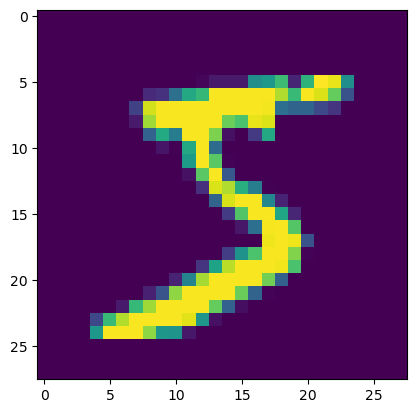

In [9]:
imshow(train_images[0].reshape(28,28))

In [10]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
train_labels[0]

5

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
train_labels.shape

(60000,)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
test_labels.shape

(10000,)

In [16]:
from keras import models
from keras import layers

In [24]:
#This problem is multi-class classification

network = models.Sequential()# sequencial ka object banaya kuinke isme humne layers dalni hai 

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))# dense layer fully connected layer hot hai ,isme 
# humne 512 neurons lagai hain ,isline me 784 ki input ayer hain(28*28) i aur 512 ki hiden layer hain tou hum ye kehsakte
# hain ke ye 2 layers hain par kuch log isse aik layer bhi kehte hain ,ye jo 512 likha hai ye practice ke baad aya hai 
# matlab hum jab  ye neurons likhte hain tou hum change kar kar ke dekhte hain ke kis value par ye acha anaswer deraha ha 
# pehli layer me humne relu activation function dia hai pehli layer me hum reu hi dete hain
# isme input aur hiddn layer hai 
network.add(layers.Dense(10, activation='softmax'))# ye humari akhri layer hain isme humne 10 neurons isliye likhe hain 
# kuinke humare paas o abeld hain wo 0-9 hain ,jab multi class classification hongi tou hum sftmax activation function use
# karenge ,ye output layer hai 
# ye model itna koicomplex nahi hai isme bas aik input layer hai ,aik hidden aur 1 output 

In [25]:
network.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # optimizerr humesha yahi use karen koi masla nahi 


#for multiclass classification problem:
#Last layer activation function -> softmax
#Loss function - Categorical crossentropy or sparse categorical cross entropy for multi class classification

#Metrics
#For classification -> accuracy
#For regression -> MSE


In [26]:
train_images = train_images.reshape((60000, 28 * 28)) # hum data ko one dimesion me larahe hain yahan 
# 784 me data ko larahe hain ye hum 1 dimesion me isliye karrahe kuinke dense layer
# one dimension data deti hai matlab ye actually 3 dimension se 2 dimesion me agaya hai  
train_images = train_images.astype('float32') / 255 #Converting pixels between 0 and 1

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [27]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)# 60000/128 = 469

Epoch 1/5
469/469 [==============================] - 11s 22ms/step - loss: 2.2321 - accuracy: 0.2600
Epoch 2/5
469/469 [==============================] - 10s 22ms/step - loss: 1.6665 - accuracy: 0.6026
Epoch 3/5
469/469 [==============================] - 10s 20ms/step - loss: 1.0463 - accuracy: 0.7518
Epoch 4/5
469/469 [==============================] - 9s 20ms/step - loss: 0.7506 - accuracy: 0.8120
Epoch 5/5
469/469 [==============================] - 10s 20ms/step - loss: 0.6055 - accuracy: 0.8406


In [29]:
 test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 5ms/step - loss: 0.5408 - accuracy: 0.8586


In [31]:
print('test_acc:', test_acc)

test_acc: 0.8586000204086304


In [40]:
network.predict(train_images[3].reshape((1,28*28)))# ye multiple images expect karraha hota hai isliye agr humme srf 1 
# image ko bhi evaluate karana hai tou uske lye bhi 1 likhna hga 
# probabilities

1/1 [==============================] - 0s 45ms/step


array([[2.7632506e-05, 8.5182005e-01, 5.1770862e-02, 2.0507807e-02,
        1.1237971e-03, 5.7492615e-03, 1.9318040e-03, 3.0909954e-03,
        6.1787490e-02, 2.1902390e-03]], dtype=float32)

In [41]:
network.predict(train_images[3].reshape((1,28*28))).argmax()

1/1 [==============================] - 0s 47ms/step


1